# Etapes a faire avant traiter les Analyses

### 1. Importation de tous les bibliotheques

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # AFD
from sklearn.model_selection import train_test_split  # Division des données
from sklearn.metrics import classification_report, accuracy_score  # Évaluation des performances
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### 2. Chargement des donnees

In [2]:
# Charger les données
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            19 non-null     object 
 1   PIB_total                          19 non-null     float64
 2   PIB_par_habitant                   19 non-null     float64
 3   Depenses_en_education_PIB          19 non-null     float64
 4   Esperance_de_vie                   19 non-null     float64
 5   Depenses_en_sante_par_habitant     19 non-null     float64
 6   Taux_mortalite_infantile           19 non-null     float64
 7   Acces_electricite                  19 non-null     float64
 8   Acces_eau_potable                  19 non-null     float64
 9   Taux_pauvrete                      19 non-null     float64
 10  Taux_chomage                       19 non-null     float64
 11  Acces_internet                     19 non-null     float64
 

### 3. Choisir les colonnes

In [4]:
# Sélectionner les colonnes numériques pour l'ACP
colonnes_numeriques = [
    'PIB_par_habitant', 'Depenses_en_education_PIB', 
    'Esperance_de_vie', 'Depenses_en_sante_par_habitant', 
    'Taux_mortalite_infantile', 'Acces_electricite', 'Acces_eau_potable', 
    'Taux_pauvrete', 'Taux_chomage', 'Acces_internet', 
    'Ratio_dette_PIB', 'Investissements_directs_etrangers', 
    'Emplois_agriculture'
]

### 4. Standardisation des donnees

In [5]:
# Préparer les données pour l'ACP
X = df[colonnes_numeriques]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-7.78328687e-01,  8.85230000e-01, -1.80745945e+00,
        -5.47710211e-01,  2.23833787e+00,  1.11821353e-01,
        -2.39766529e+00,  0.00000000e+00,  1.70530493e+00,
         0.00000000e+00,  0.00000000e+00, -5.28425403e-01,
         8.23095768e-01],
       [-4.88450781e-01, -6.71034180e-01, -3.00391273e-01,
        -6.81971649e-02, -6.69923832e-01,  3.28042287e-01,
         9.75241632e-01, -7.26432808e-01,  1.12706853e+00,
         4.24038691e-01, -2.76231089e-01, -2.53162335e-01,
         1.15422904e+00],
       [-4.61122920e-01,  1.49413609e-01, -7.01387347e-01,
        -3.96482357e-01, -1.93159619e-01,  3.28042287e-01,
         4.84533971e-01,  0.00000000e+00, -6.79132457e-02,
         8.08670895e-01, -1.43571403e+00, -8.87862493e-01,
         2.99176961e-01],
       [-6.46343253e-01, -1.49362467e+00, -2.49761212e-01,
        -5.68797299e-01,  4.62391175e-01,  2.34033185e-01,
         6.55314555e-01,  0.00000000e+00, -1.35604811e-01,
        -1.64263116e+00,  0.00000000e

**=>** Les données sont maintenant sur une échelle comparable, permettant une analyse significative.

### 5. Calcul de la matrice de correlation

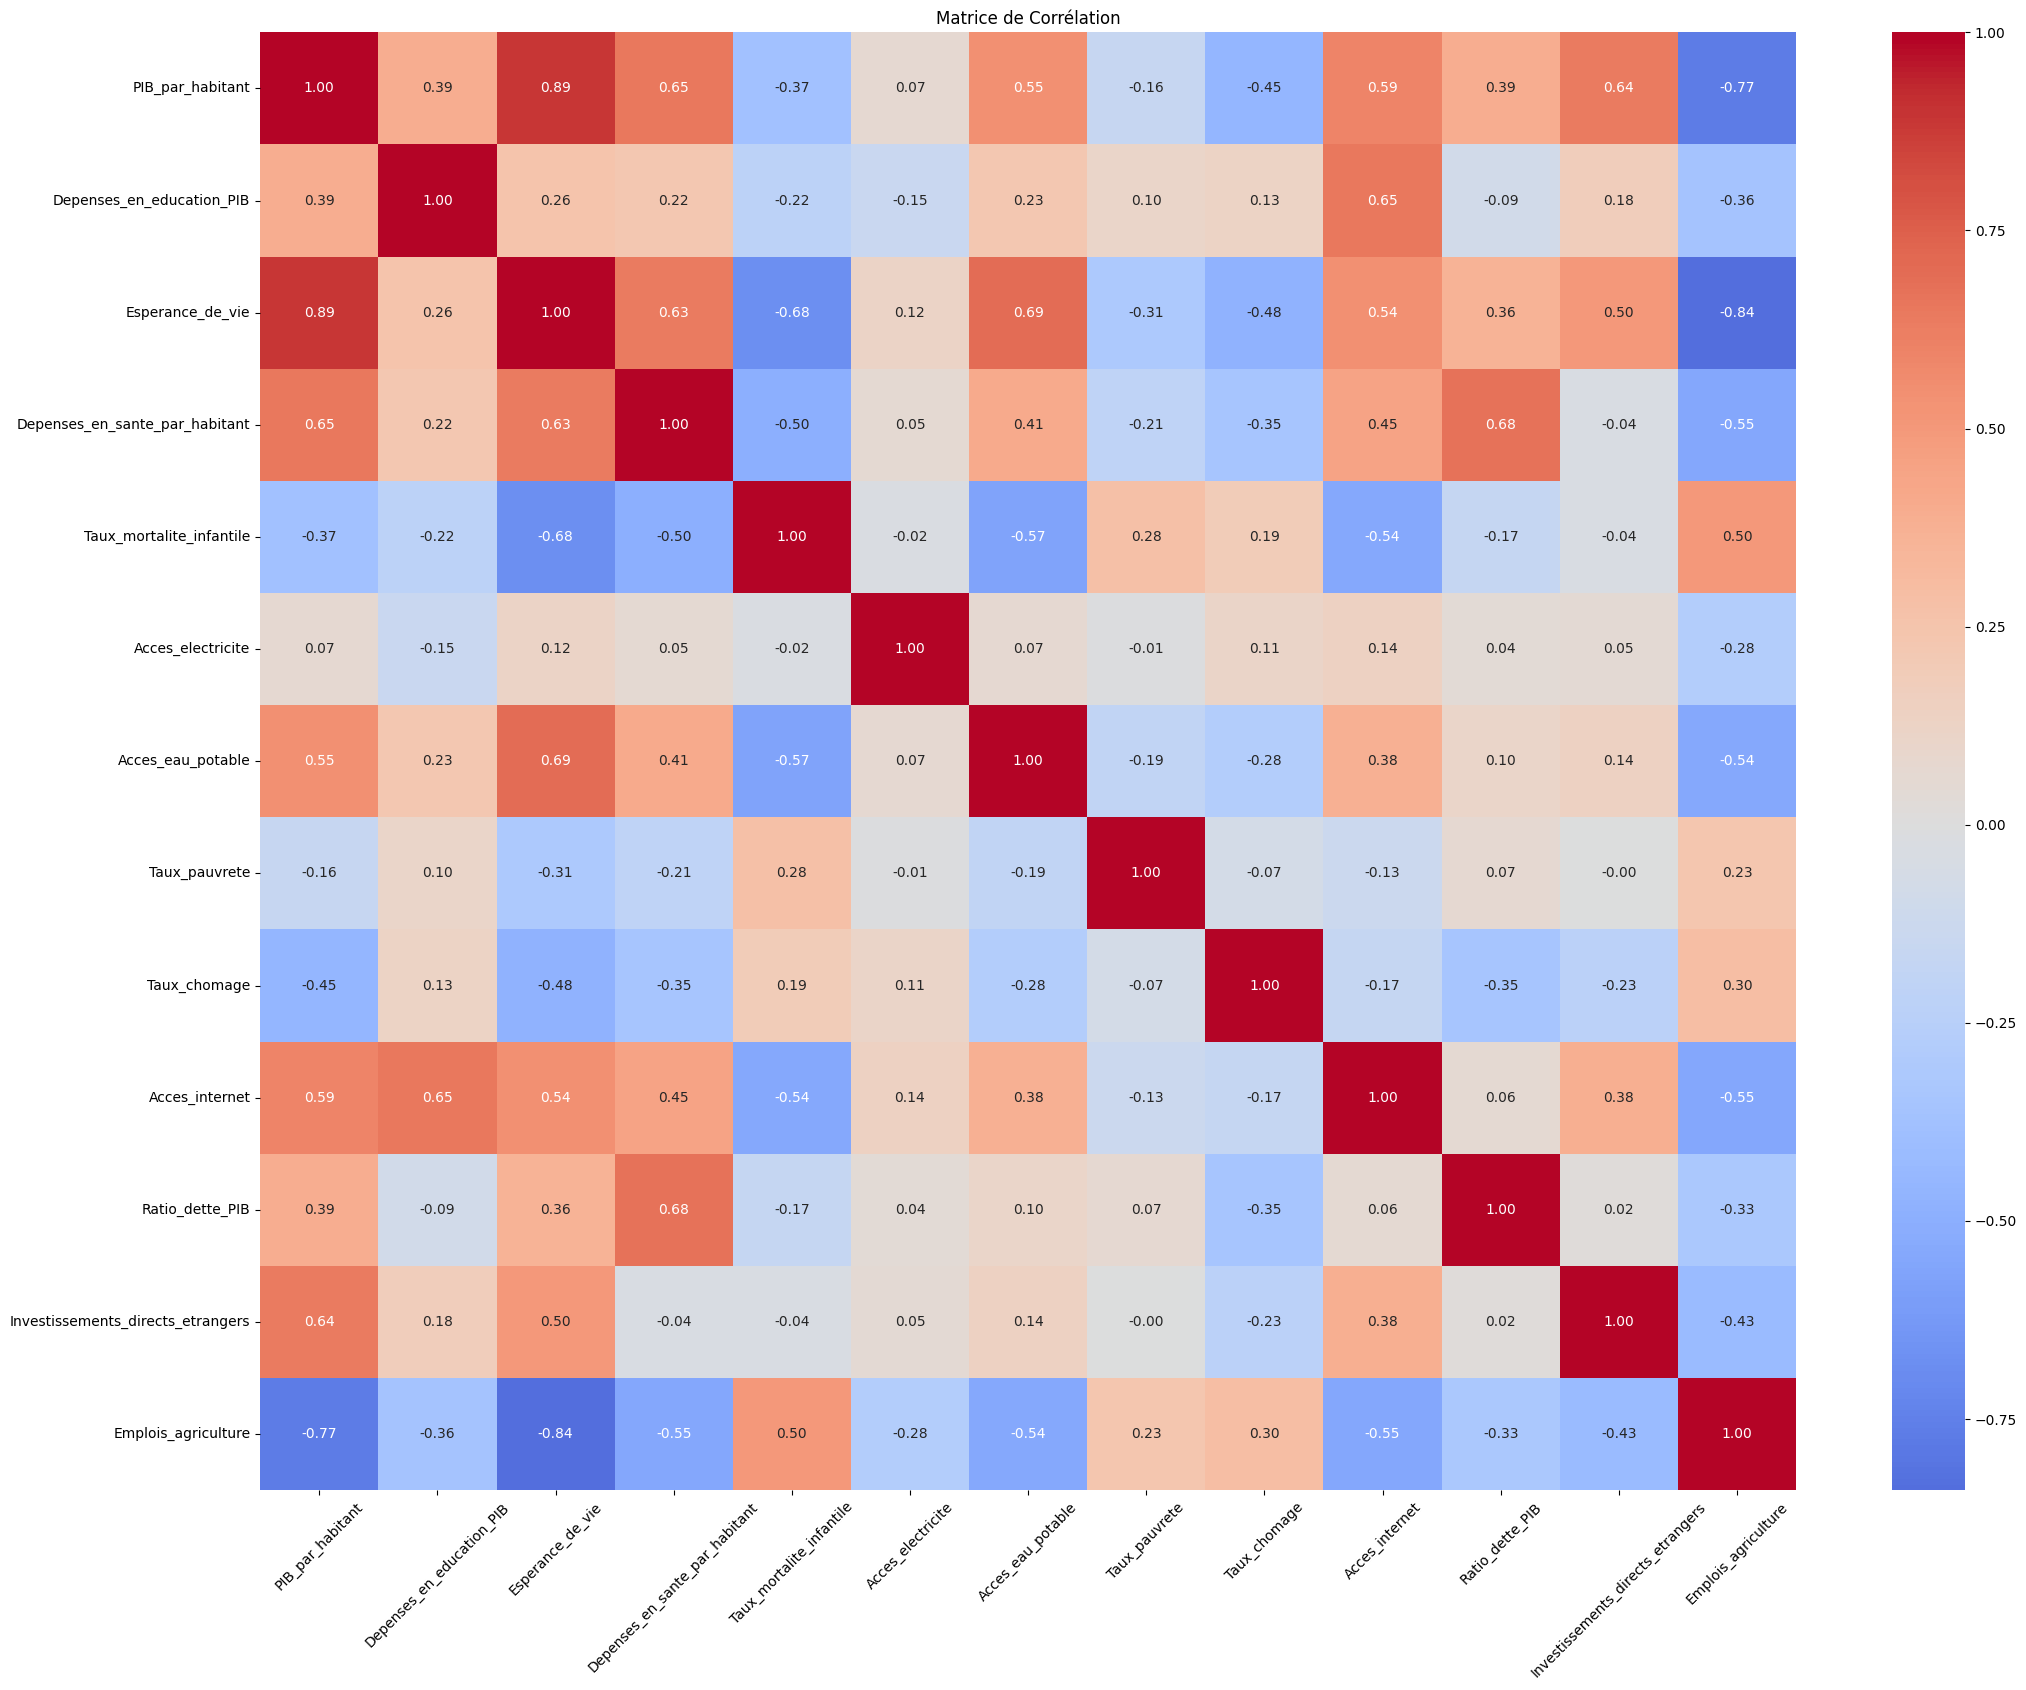

In [6]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(22, 17))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=colonnes_numeriques,  # Ajout des noms des variables sur l'axe x
            yticklabels=colonnes_numeriques)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

En observant la matrice, nous pouvons tirer plusieurs observations :

#### Corrélations fortement positives (proche de 1) :

PIB par habitant et Espérance de vie (0.89) : Plus le PIB est élevé, plus l'espérance de vie augmente.

PIB par habitant et Investissements directs étrangers (0.64) : Les régions plus riches attirent plus d'investissements.

---

#### Corrélations fortement négatives (proche de -1) :

Emplois agriculture et Espérance de vie (-0.84) : Plus la part d'emplois agricoles est importante, plus l'espérance de vie diminue.

Emplois agriculture et PIB par habitant (-0.77) : Les régions plus agricoles ont tendance à avoir un PIB plus faible.

Taux de mortalité infantile et Espérance de vie (-0.68) : Logiquement, ces deux indicateurs sont inversement corrélés.

---

#### Observations intéressantes :

L'accès à l'électricité montre peu de corrélations fortes avec les autres variables (valeurs proches de 0).

L'accès à internet est positivement corrélé avec le PIB (0.59) et les dépenses en éducation (0.65).

Les dépenses en santé par habitant sont positivement corrélées avec l'espérance de vie (0.63).

---


#### Points d'attention :

Le taux de pauvreté montre des corrélations relativement faibles avec la plupart des variables.

Le ratio dette/PIB est fortement corrélé avec les dépenses en santé (0.68), suggérant possiblement un financement par l'endettement.

---

Cette matrice permet de mettre en évidence les liens entre développement économique (PIB), indicateurs sociaux (espérance de vie, éducation) et structure économique (agriculture). Elle suggère qu'il existe un cercle vertueux entre richesse, santé et développement social, tandis que la prédominance de l'agriculture est associée à des indicateurs de développement plus faibles.

# ACP

### 1. Extraction des valeurs propres

Les valeurs propres et vecteurs propres de la matrice de corrélation sont extraits pour déterminer les composantes principales.

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

Valeurs propres : [5.32 1.63 1.37 1.2  1.07 0.81 0.53 0.44 0.29 0.01 0.04 0.19 0.12]
Vecteurs propres :
 [[-0.39 -0.01  0.25 -0.05 -0.04 -0.17 -0.17  0.13 -0.15  0.57  0.47 -0.35
   0.08]
 [-0.18 -0.52  0.06  0.47  0.18 -0.09 -0.11  0.25  0.2   0.02 -0.2   0.14
   0.51]
 [-0.41  0.05 -0.   -0.14 -0.13  0.04 -0.1  -0.11  0.14 -0.71  0.35 -0.19
   0.28]
 [-0.32  0.31 -0.16  0.28  0.21 -0.21  0.03  0.15 -0.21 -0.14 -0.47 -0.51
  -0.18]
 [ 0.29  0.02  0.41 -0.11  0.11 -0.29 -0.29  0.61 -0.14 -0.32  0.1   0.09
  -0.19]
 [-0.06 -0.   -0.1  -0.58  0.68  0.2   0.15  0.16 -0.07  0.06 -0.08 -0.02
   0.29]
 [-0.3  -0.03 -0.22 -0.04 -0.18  0.5  -0.53  0.18 -0.4   0.03 -0.14  0.29
  -0.1 ]
 [ 0.11  0.01  0.52  0.33  0.36  0.56 -0.13 -0.25  0.04 -0.07  0.07 -0.23
  -0.16]
 [ 0.2  -0.37 -0.34 -0.02  0.31 -0.33 -0.47 -0.42 -0.16 -0.07  0.14 -0.13
  -0.16]
 [-0.31 -0.36 -0.02  0.15  0.17 -0.02  0.53  0.04 -0.34 -0.15  0.27  0.26
  -0.4 ]
 [-0.18  0.55  0.12  0.21  0.3  -0.27 -0.12 -0.27 -0.1   0.03  0.

### 2. Illustration des composantes principales

La variance expliquée par chaque composante est visualisée pour choisir le nombre optimal de composantes.

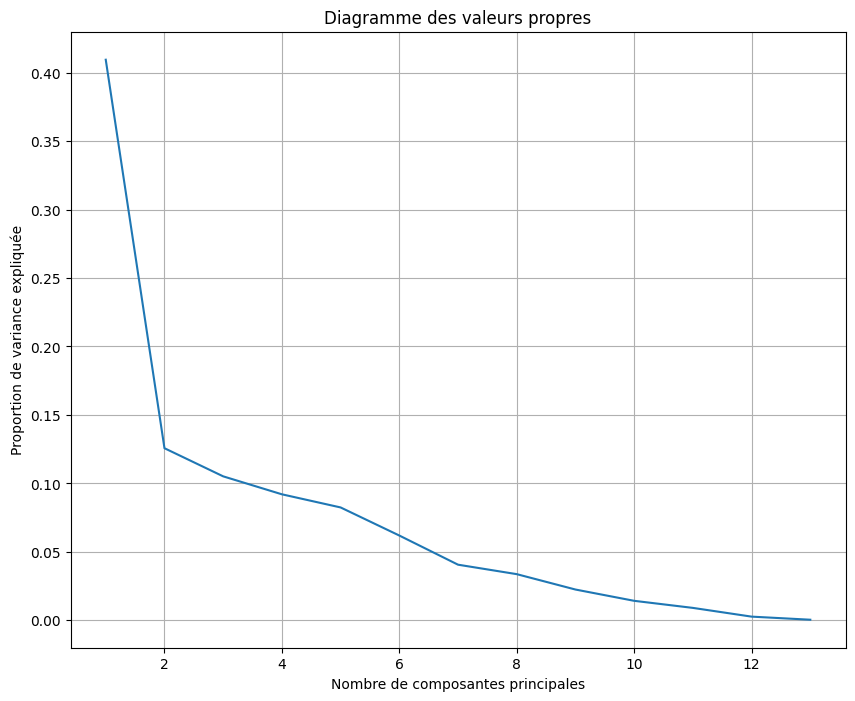

In [8]:
pca = PCA(n_components=len(colonnes_numeriques))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

 Ce graphe représente la proportion de variance expliquée par chaque composante principale.

La forme caractéristique en coude :

- Une forte pente au début (entre les composantes 1 et 2).
- Puis un aplatissement progressif de la courbe.

---

Interprétation des proportions :

- La première composante explique environ 40% de la variance totale.
- La deuxième composante explique environ 12-13%.
- Les composantes suivantes expliquent chacune moins de 10% de la variance.

---

Choix du nombre de composantes à retenir :

- Selon le critère du coude, on pourrait retenir 2 composantes.
- Ces 2 premières composantes expliqueraient environ 52-53% de la variance totale.

### 3. Application de l'ACP

#### 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [9]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### 2. Affichage des nouvelles données projetées sur les composantes principales.

In [10]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[-3.18591628 -1.05092994]
 [-0.49999961 -0.33392661]
 [-0.64211861 -1.0642309 ]
 [-1.45242517  1.36934406]
 [ 1.04769096 -0.01479959]
 [ 3.72715691 -1.44731185]
 [-1.67129639 -0.55063633]
 [ 0.51114984 -1.26029429]
 [ 4.50881086  3.45320136]
 [-0.14763024  0.02075907]
 [ 3.71917723 -0.38839996]
 [-2.40108906  1.33289742]
 [ 3.45820993 -1.02041672]
 [-0.58759348 -0.6789842 ]
 [-2.70869852 -0.75687666]
 [-3.10940405  1.66362799]
 [-0.89619156  1.51129348]
 [ 0.31340312 -1.27269619]
 [ 0.01676414  0.48837984]]


#### 3. Visualisation des données dans l'espace des deux premières composantes principales.

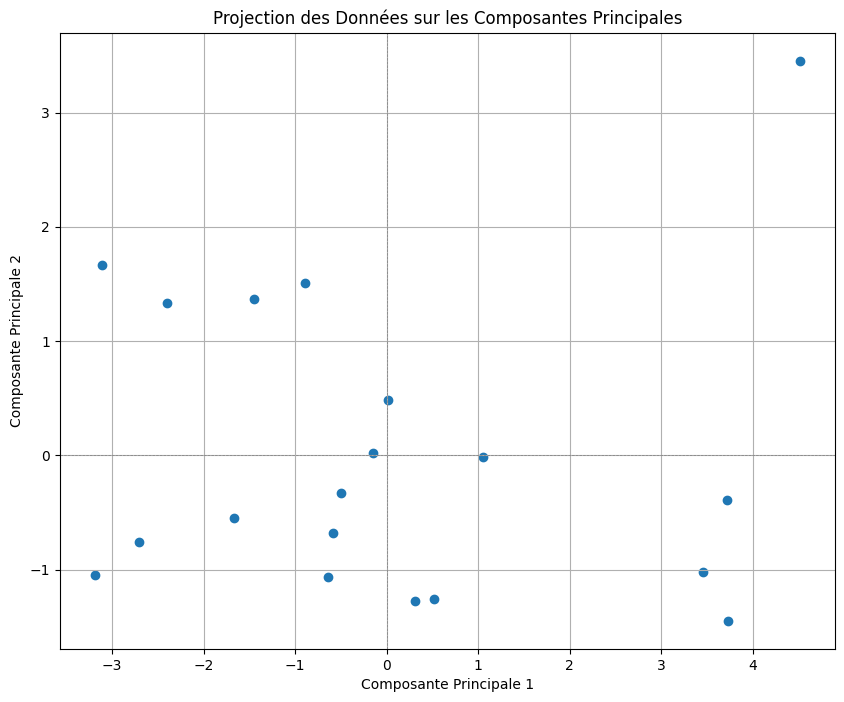

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

Ce graphe représente la projection des données sur les deux premières composantes principales issues de l'ACP. Chaque point représente un pays asiatique projetée dans ce nouvel espace à deux dimensions.

1. Distribution des points :
- Les points sont dispersés sur l'ensemble du graphe, suggérant une bonne discrimination entre les observations.
- On observe quelques points isolés, notamment un point très éloigné en haut.
- Plusieurs points se regroupent autour de l'origine (0,0).

---

2. Interprétation des axes :
- La Composante Principale 1 s'étend principalement de -3 à 4
   * Cette composante capture la plus grande variance des données (environ 40% d'après le graphe précédent).
   * Les observations très positives ou négatives sur cet axe sont les plus différentes selon ce premier critère.

- La Composante Principale 2 s'étend de -1.5 à 3.5
   * Cette composante capture la deuxième plus grande source de variation (environ 12-13%).

---

3. Groupements potentiels :
- On peut observer plusieurs groupes potentiels :
   * Un groupe central autour de l'origine.
   * Quelques points isolés qui pourraient représenter des cas particuliers.
   * Une tendance à la dispersion plus importante sur l'axe pc1 que pc2.

### 4. Visualisation de la corrélation entre les variables d'origine et les nouvelles composantes

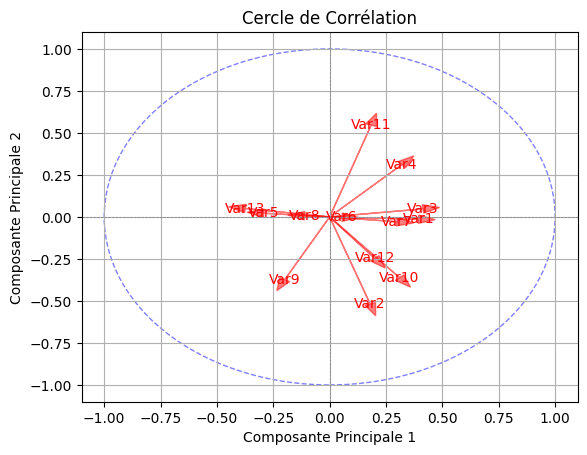

In [12]:
components = pca.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, f"Var{i+1}", color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

1. Composante Principale 1 représente le niveau de développement :
- Corrélations positives :
  * PIB par habitant
  * Espérance de vie
  * Accès à internet
  * Dépenses en santé par habitant
  * Accès à l'eau potable


- Corrélations négatives :
  * Emplois dans l'agriculture
  * Taux de mortalité infantile

2. Composante Principale 2 semble représenter les aspects financiers et économiques :
- Corrélations positives :
  * Ratio dette/PIB
  * Investissements directs étrangers
  * Dépenses en éducation (% PIB)

- Corrélations négatives:
  * Taux de chômage
  * Taux de pauvreté

3. Observations importantes :
- Les variables de développement humain (santé, éducation, espérance de vie) sont fortement corrélées entre elles
- L'emploi agricole s'oppose aux indicateurs de développement
- Certaines variables sont moins bien représentées car plus proches du centre du cercle (leurs vecteurs sont plus courts)

Cette visualisation confirme que :
1. La première composante capture principalement le niveau de développement global
2. La seconde composante reflète plutôt la structure économique et financière des pays

# AFD

In [13]:

y = df['Niveau_de_developpement']  # Variable cible

# Appliquer l'AFD (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_pca, y)

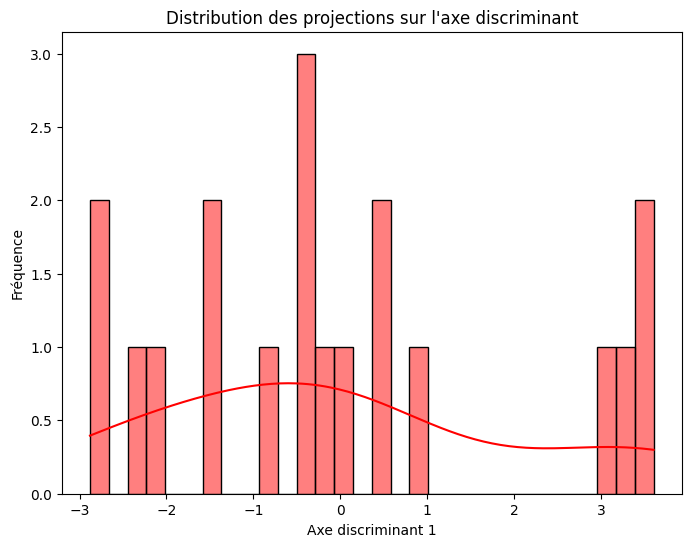

In [14]:
# 4. Visualisation de la distribution des données sur le premier axe discriminant
plt.figure(figsize=(8, 6))
sns.histplot(X_lda[:, 0], kde=True, color='red', bins=30)
plt.title("Distribution des projections sur l'axe discriminant")
plt.xlabel("Axe discriminant 1")
plt.ylabel("Fréquence")
plt.show()

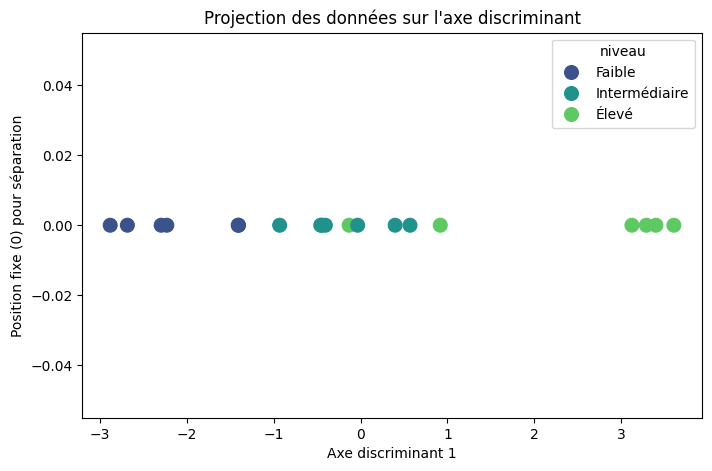

In [15]:
# Visualisation de la projection des données sur l'axe discriminant (1D) avec taille des points et couleurs ajustées
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_lda[:, 0], y=[0]*len(X_lda), hue=y, palette='viridis', s=100, edgecolor=None, legend='full')
plt.title("Projection des données sur l'axe discriminant")
plt.xlabel("Axe discriminant 1")
plt.ylabel("Position fixe (0) pour séparation")
plt.legend(title='niveau', loc='upper right')
plt.show()

In [16]:
# Assuming lda.coef_ has shape (n_classes - 1, n_features)
coefficients = pd.DataFrame(lda.coef_, columns=colonnes_numeriques[:lda.coef_.shape[1]])  # Adjust columns based on the number of features
coefficients = coefficients.transpose()

# Create column names based on the number of classes
coefficients.columns = [f'Axe discriminant {i+1}' for i in range(coefficients.shape[1])]  # Adjust for multiple axes
coefficients = coefficients.sort_values(by=coefficients.columns[0], ascending=False)  # Sort by the first axis

# Afficher les coefficients associés à l'axe discriminant
print("Coefficients des variables pour les axes discriminants :")
print(coefficients)

# Trier les coefficients par ordre décroissant
coefficients = coefficients.sort_values(by=coefficients.columns[0], ascending=True)

Coefficients des variables pour les axes discriminants :
                           Axe discriminant 1  Axe discriminant 2  \
Depenses_en_education_PIB            0.345755           -0.188527   
PIB_par_habitant                    -1.874928           -0.170199   

                           Axe discriminant 3  
Depenses_en_education_PIB           -0.125806  
PIB_par_habitant                     2.073493  


C:\Users\one\AppData\Local\Temp\ipykernel_9968\4033046736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients['Axe discriminant 1'], y=coefficients.index, palette='viridis')


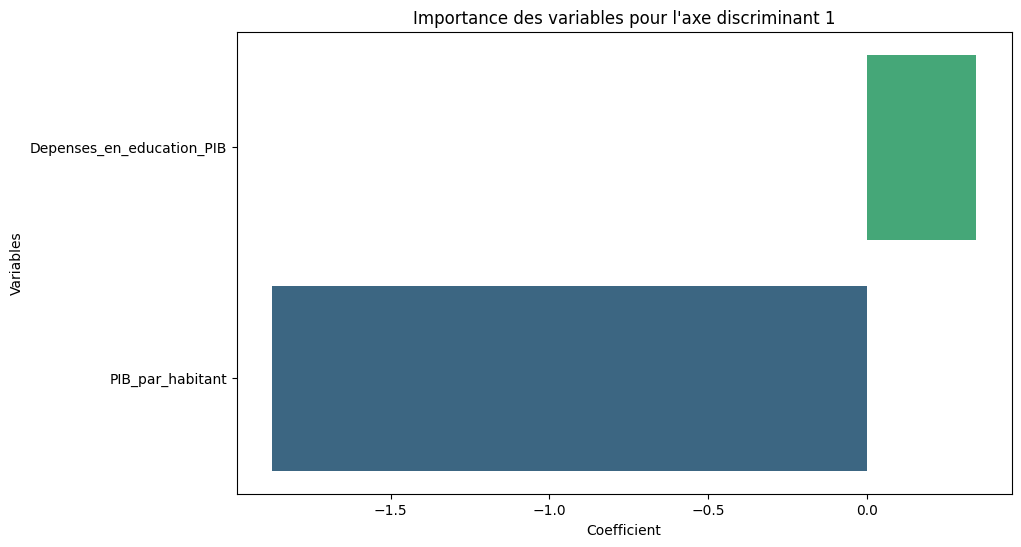

In [17]:
# Visualisation des coefficients avec des barres horizontales et variables en bas
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Axe discriminant 1'], y=coefficients.index, palette='viridis')
plt.title("Importance des variables pour l'axe discriminant 1")
plt.xlabel("Coefficient")
plt.ylabel("Variables")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que les variables les plus influentes soient en bas
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Appliquer l'AFD sur les données d'entraînement
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lda.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.4f}")

Précision du modèle : 0.8333


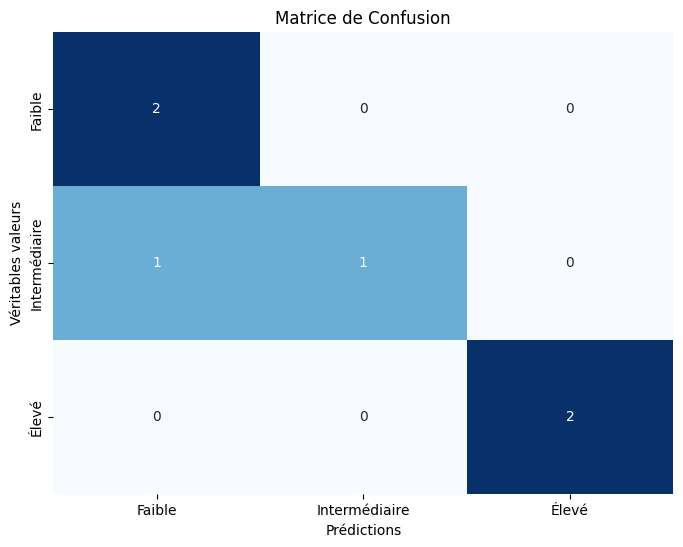

In [19]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Faible', 'Intermédiaire', 'Élevé'], yticklabels=['Faible', 'Intermédiaire', 'Élevé'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables valeurs")
plt.show()

In [20]:
# Rapport de classification (précision, rappel, F1-score)
class_report = classification_report(y_test, y_pred)
print("Rapport de classification :")
print(class_report)

Rapport de classification :
               precision    recall  f1-score   support

       Faible       0.67      1.00      0.80         2
Intermédiaire       1.00      0.50      0.67         2
        Élevé       1.00      1.00      1.00         2

     accuracy                           0.83         6
    macro avg       0.89      0.83      0.82         6
 weighted avg       0.89      0.83      0.82         6



# CAH

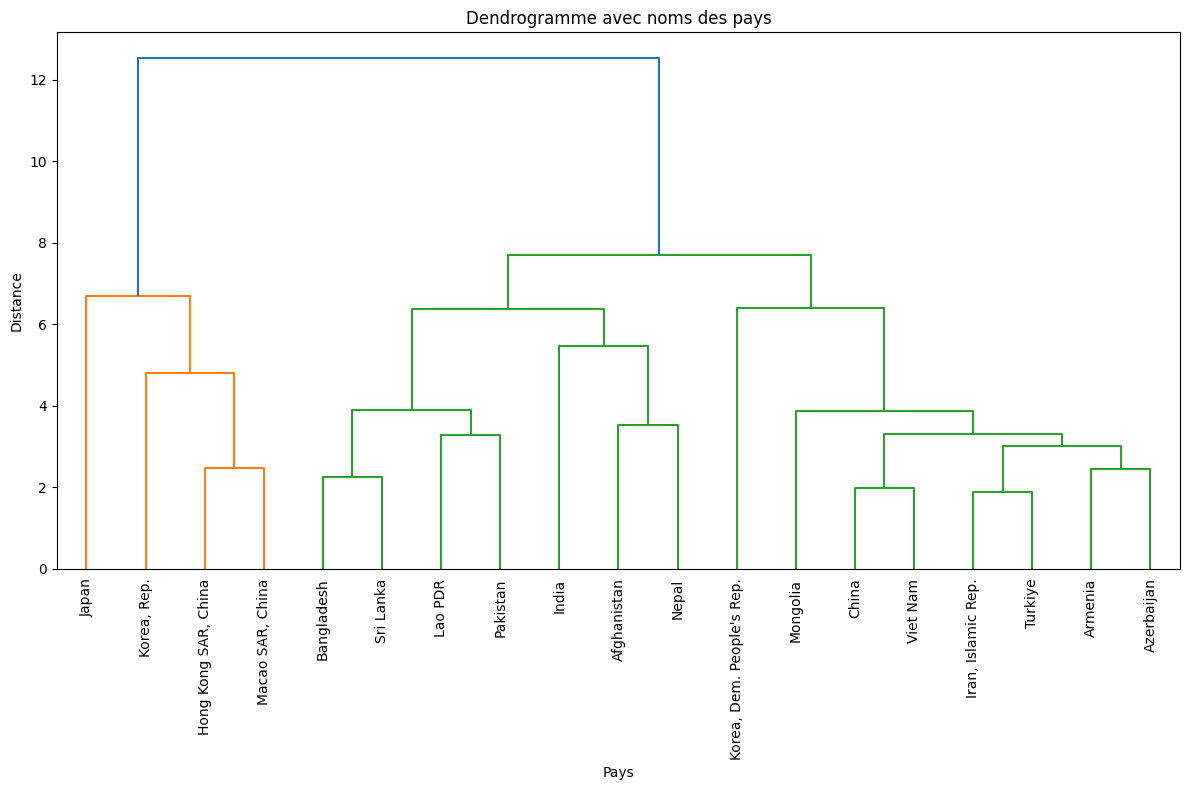

In [25]:
# Créer une matrice de linkage pour le dendrogramme
country_names = df['Country'] 
linkage_matrix = linkage(X_scaled, method='ward')

# Afficher le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=country_names.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme avec noms des pays")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [33]:
# Appliquer la classification ascendante hiérarchique
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = model.fit_predict(X_scaled)

# Ajouter les clusters aux données
df['Cluster'] = clusters